In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
directory = "D:\Anytime-Sequential-Halving\entropyWeight"

In [24]:
agents = {"VSUCT": "UCT", "BroadSearch": "Anytime Sequential Halving"}

games = ["Yavalath", "Breakthrough", "Amazons", "Clobber"]
budgets = [1000, 20000, 50000]
weights = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
data = []

for agentFolder, agent in agents.items():
    for game in games:
        for budget in budgets:
            for weight in weights:
                path = f"{directory}/{agentFolder}/{game}/budget_{budget}/weight_{weight}/raw_results.csv"

                df = pd.read_csv(path)

                wins = losses = draws = total = 0

                for row in df.itertuples(index=False):
                    agentColoumn = row.agents.strip("()")
                    agentColoumn = agentColoumn.replace("'", "")
                    agentColoumn = agentColoumn.split(" / ")
                    scoreColoumn = list(map(float, row.utilities.split(";")))

                    for index, agentName in enumerate(agentColoumn):
                        if "EntropySHUCTAnytime" in agentName:
                            score = scoreColoumn[index]
                            break
                    else:
                        print("Entropy agent not found in row")
                        continue

                    if score == 1.0:
                        wins += 1
                    elif score == -1.0:
                        losses += 1
                    else:
                        draws += 1

                    total += 1

                data.append({
                    "folder": agentFolder,
                    "opponent": agent,
                    "game": game,
                    "budget": budget,
                    "weight": weight,
                    "wins": wins,
                    "draws": draws,
                    "losses": losses,
                    "win_Percentage": wins / total,
                    "loss_Percentage": losses / total,
                    "draw_Percentage": draws / total
                })


df = pd.DataFrame(data)
df = df.sort_values(by=["game", "budget", "weight"])
df = df.reset_index(drop=True)
df.head()


,folder,opponent,game,budget,weight,wins,draws,losses,win_Percentage,loss_Percentage,draw_Percentage
0,VSUCT,UCT,Amazons,1000,0.0,63,0,37,0.63,0.37,0.0
1,BroadSearch,Anytime Sequential Halving,Amazons,1000,0.0,51,0,49,0.51,0.49,0.0
2,VSUCT,UCT,Amazons,1000,0.1,60,0,40,0.60,0.40,0.0
3,BroadSearch,Anytime Sequential Halving,Amazons,1000,0.1,49,0,51,0.49,0.51,0.0
4,VSUCT,UCT,Amazons,1000,0.2,49,0,51,0.49,0.51,0.0


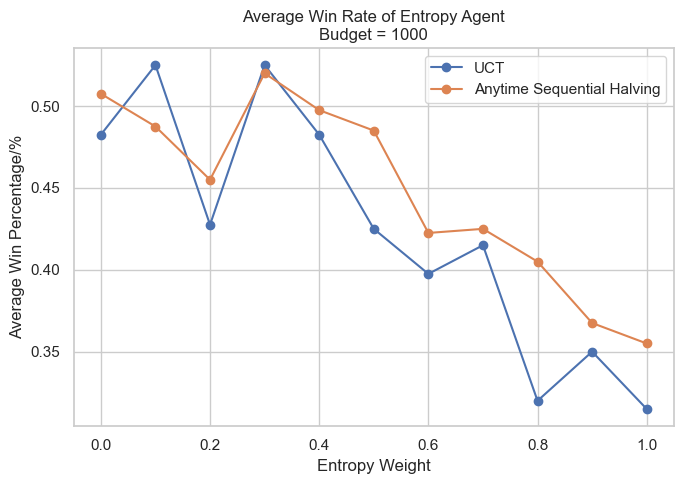

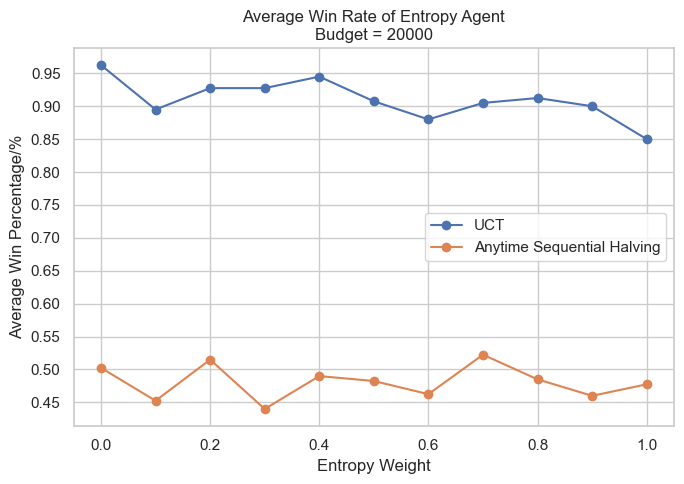

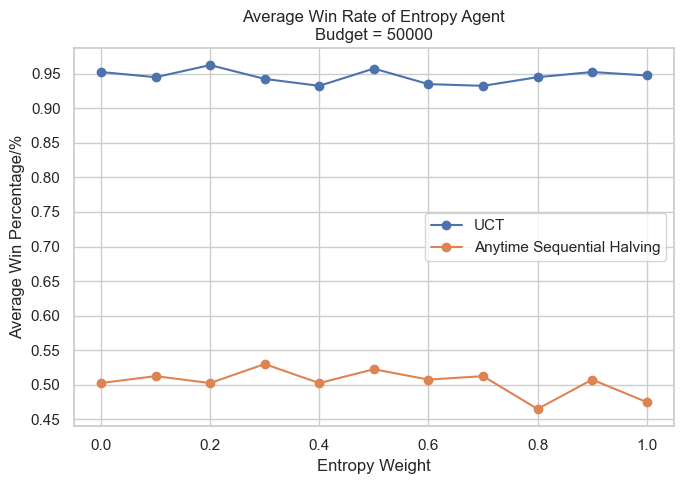

In [ ]:
sns.set_theme(style="whitegrid")

#Create 3 plots since we have 3 budgets
#Loop through each budget
for budget in budgets:
    #Plot parameters
    plt.figure(figsize=(7, 5))
    plt.title(f"Average Win Rate of Entropy Agent\nBudget = {budget}")
    plt.xlabel("Entropy Weight")
    plt.ylabel("Average Win Percentage/%")
    plt.yticks(np.linspace(0, 1, 21))
    #plt.xticks(np.linspace(0, 1, 11))
    
    #Loop through the opponent agents
    for opponent in df["opponent"].unique():
        #Created filtered df to only get rows with the current budget and enemy agent
        filtered_rows = df[(df["budget"] == budget) & (df["opponent"] == opponent)]
        
        #Group by weight and calculate average win rate for that weight across all the games
        averageDF= filtered_rows.groupby("weight")["win_Percentage"].mean().reset_index()

        #Plot average win percentage for each weight value
        plt.plot(averageDF["weight"], averageDF["win_Percentage"], marker='o', label=opponent)

    plt.legend()
    plt.tight_layout()
    plt.show()